In [3]:
!pip install seaborn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.5 MB/s eta 0:00:001.6 MB/s eta 0:00:01


In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
!pwd

/Users/ESMoraEn/repositories/CI-ML/notebooks


In [7]:
data_path = '../data/payments_phoenix_2020.csv'
df = pd.read_csv(data_path)

In [8]:
df.head()

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00


In [6]:
df['Benefits Category'].describe()

count    15082.000000
mean       100.276157
std        293.146069
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        999.000000
Name: Benefits Category, dtype: float64

In [9]:
df['Benefits_Category'] = df['Benefits Category'].astype('category')

In [10]:
df.head()

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09,4.0
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57,4.0
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91,5.0
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32,7.0
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00,998.0


<Axes: >

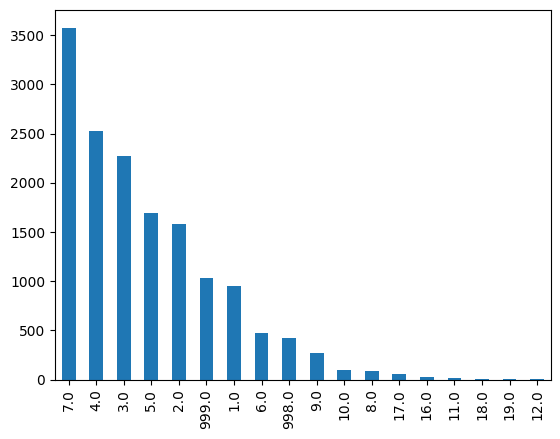

In [11]:
df['Benefits_Category'].value_counts().plot(kind='bar')

Every department has different benefits category

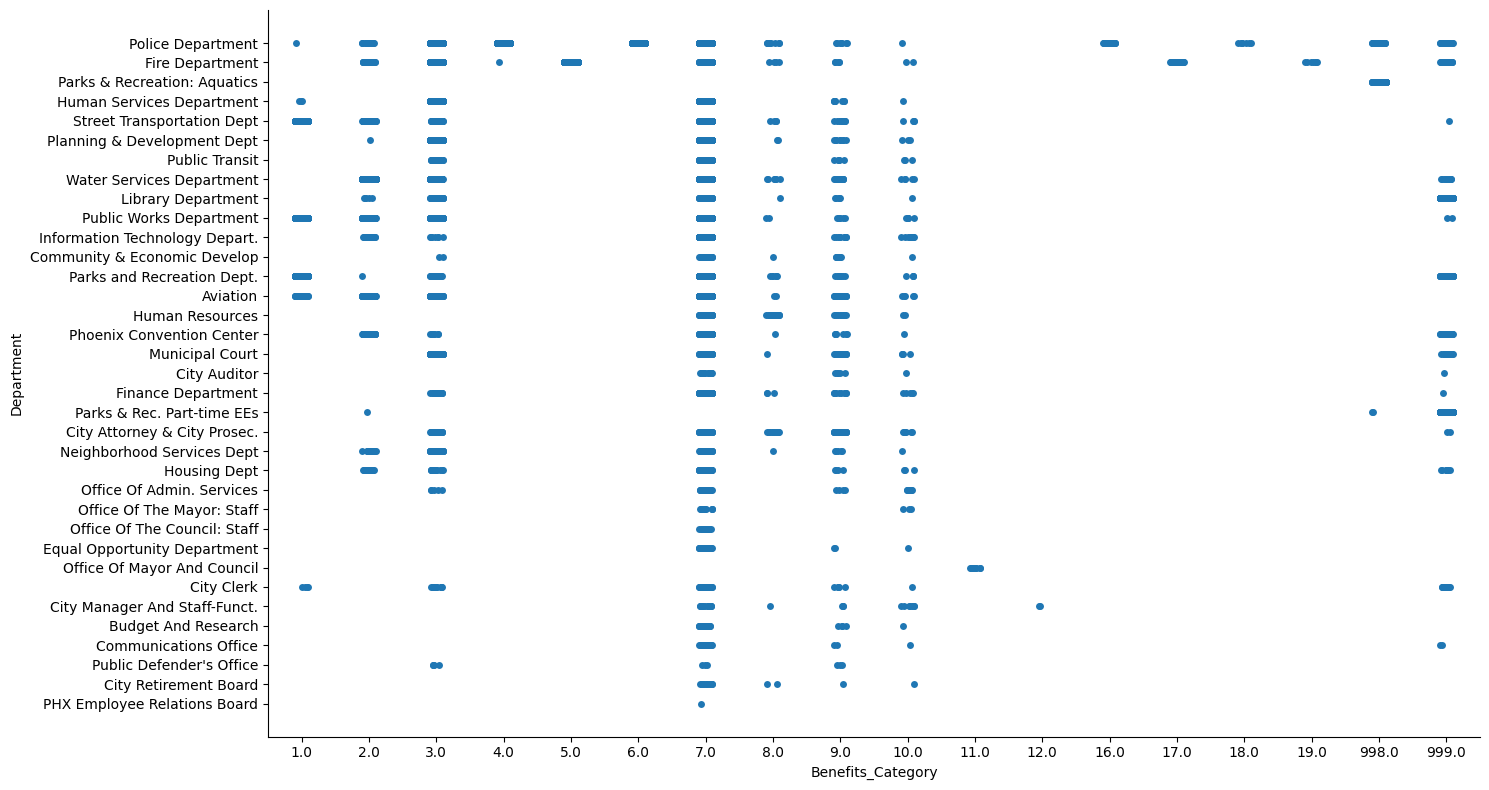

In [12]:
sns.catplot(x="Benefits_Category", y="Department", data=df, height=8, aspect=15/8)

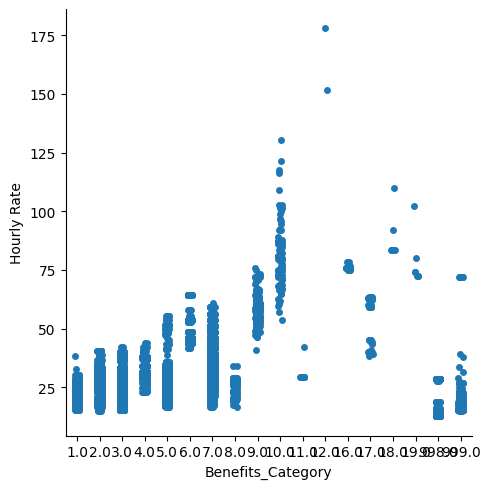

In [13]:
sns.catplot(x="Benefits_Category", y="Hourly Rate", data=df)

Clearly, the hourly rate has a relation with the benefits category

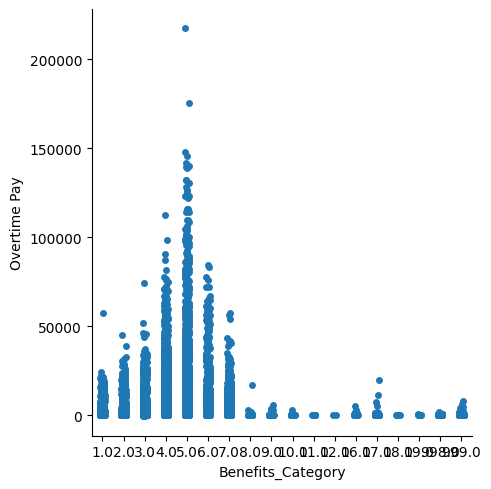

In [14]:
sns.catplot(x="Benefits_Category", y="Overtime Pay", data=df)

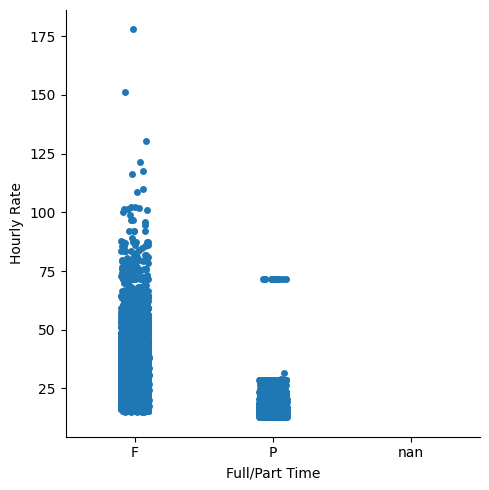

In [15]:
sns.catplot(x="Full/Part Time", y="Hourly Rate", data=df)

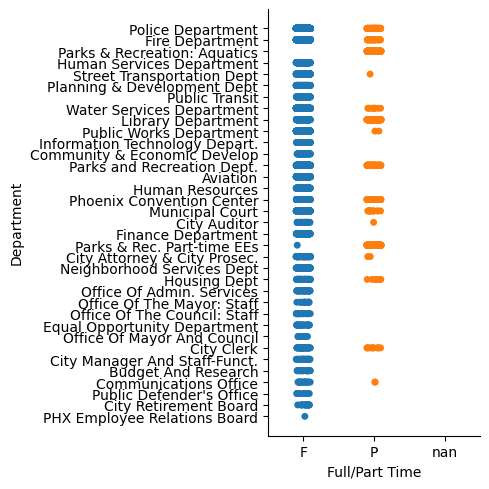

In [16]:
sns.catplot(x="Full/Part Time", y="Department", hue="Full/Part Time", data=df)

The intuition sais that Hourly Rate should not depend on the Part / Full Time. Nevertheless should be a relation between the department and the F/P time, since some departments have more people in both modalities

In [17]:
df_dep = df.groupby(['Department'])

In [18]:
df_dep.head()

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09,4.0
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57,4.0
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91,5.0
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32,7.0
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5328,"Guardado,Betty S",11.0,Office Of Mayor And Council,Council Member,F,2019-06-06T00:00:00,NaN,29.62,61599.20,0.00,6735.00,11.0
6858,"Juarez,Estella P",3.0,Public Defender's Office,Court/Legal Clerk II,F,1997-12-15T00:00:00,NaN,21.57,44484.80,0.00,3950.00,3.0
9429,"Morris,Melvin Anthony",3.0,Public Defender's Office,Legal Assistant,F,2020-05-04T00:00:00,NaN,28.75,58335.04,0.00,75.00,3.0
9959,"Obregon JR,Salvador",7.0,Public Defender's Office,Admin Asst II,F,2002-08-19T00:00:00,NaN,41.78,85972.80,0.00,4684.20,7.0


In [19]:
pd.set_option('display.max_rows', None)
print(df_dep['Job Title'].value_counts())

Department                      Job Title                     
Aviation                        Airport Operations Assistant        71
                                Aviation Supv II                    40
                                Building Maint Worker*U2            34
                                Building Equip Op I                 28
                                Airfield Maint Worker I             24
                                Aviation Dispatcher                 22
                                Electrician                         22
                                Aviation Superintendent             21
                                Aviation Supv III                   21
                                Project Manager                     21
                                User Technology Specialist*U2       21
                                Airport Security Guard              19
                                Equipment Op II*U2                  18
              

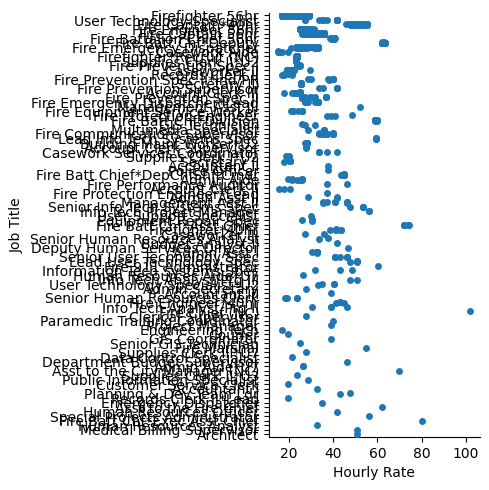

In [20]:
sns.catplot(x="Hourly Rate", y="Job Title", data=df[df['Department']=='Fire Department'])

In [19]:
df['Hire Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15083 entries, 0 to 15082
Series name: Hire Date
Non-Null Count  Dtype 
--------------  ----- 
15082 non-null  object
dtypes: object(1)
memory usage: 118.0+ KB


In [21]:
df['Hire_Date'] = pd.to_datetime(df['Hire Date'])
df['Termination_Date'] = df['Termination Date']
df[0:10]

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category,Hire_Date,Termination_Date
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09,4.0,1991-07-15,NaN
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57,4.0,2018-12-17,NaN
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91,5.0,2008-01-14,NaN
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32,7.0,2009-12-28,NaN
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00,998.0,2010-04-19,NaN
5,"Abbs,Angela",3.0,Human Services Department,Secretary II,F,2019-12-30T00:00:00,2021-06-04T00:00:00,15.98,14685.52,0.00,1286.39,3.0,2019-12-30,2021-06-04T00:00:00
6,"Abdellatif,Tariq",7.0,Street Transportation Dept,Environmental Quality Spec,F,2016-09-12T00:00:00,NaN,41.78,85972.80,0.00,1746.20,7.0,2016-09-12,NaN
7,"Abdin,Patricia Ochoa",7.0,Planning & Development Dept,Chief Engineering Tech*U7,F,2016-09-26T00:00:00,NaN,23.58,45128.00,0.00,75.00,7.0,2016-09-26,NaN
8,"Abdoulkadri,Almoustapha",3.0,Public Transit,Municipal Security Guard,F,2018-10-08T00:00:00,NaN,22.64,44964.16,1401.18,1649.20,3.0,2018-10-08,NaN
9,"Abdull-Fattah,Rouba B",7.0,Water Services Department,GIS Coordinator,F,1999-04-19T00:00:00,NaN,43.92,90379.20,0.00,7633.80,7.0,1999-04-19,NaN


In [22]:
df.loc[pd.isnull(df['Termination_Date']),'Termination_Date'] = '2022-01-01'

In [23]:
df['Termination_Date'] = pd.to_datetime(df['Termination_Date'])
df[0:6]

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category,Hire_Date,Termination_Date
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09,4.0,1991-07-15,2022-01-01
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57,4.0,2018-12-17,2022-01-01
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91,5.0,2008-01-14,2022-01-01
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32,7.0,2009-12-28,2022-01-01
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00,998.0,2010-04-19,2022-01-01
5,"Abbs,Angela",3.0,Human Services Department,Secretary II,F,2019-12-30T00:00:00,2021-06-04T00:00:00,15.98,14685.52,0.00,1286.39,3.0,2019-12-30,2021-06-04


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15083 entries, 0 to 15082
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               15082 non-null  object        
 1   Benefits Category  15082 non-null  float64       
 2   Department         15082 non-null  object        
 3   Job Title          15082 non-null  object        
 4   Full/Part Time     15082 non-null  object        
 5   Hire Date          15082 non-null  object        
 6   Termination Date   1225 non-null   object        
 7   Hourly Rate        15082 non-null  float64       
 8   Regular Pay        15082 non-null  float64       
 9   Overtime Pay       15082 non-null  float64       
 10  Other Pay          15082 non-null  float64       
 11  Benefits_Category  15082 non-null  category      
 12  Hire_Date          15082 non-null  datetime64[ns]
 13  Termination_Date   15083 non-null  datetime64[ns]
dtypes: cat

In [25]:
df['working_months'] = ((df.Termination_Date - df.Hire_Date)/np.timedelta64(1, 'M'))

In [26]:
df.head()

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category,Hire_Date,Termination_Date,working_months
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09,4.0,1991-07-15,2022-01-01,365.609150
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57,4.0,2018-12-17,2022-01-01,36.501776
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91,5.0,2008-01-14,2022-01-01,167.592764
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32,7.0,2009-12-28,2022-01-01,144.134376
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00,998.0,2010-04-19,2022-01-01,140.454629


In [27]:
today = '2022-01-01'
df['today'] = pd.to_datetime(today)
df['antiguity_months'] = ((df.today - df.Hire_Date)/np.timedelta64(1, 'M'))
df.head()

,Name,Benefits Category,Department,Job Title,Full/Part Time,Hire Date,Termination Date,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category,Hire_Date,Termination_Date,working_months,today,antiguity_months
0,"Aamodt,Gail L",4.0,Police Department,Police Officer,F,1991-07-15T00:00:00,NaN,37.79,71560.00,0.00,5238.09,4.0,1991-07-15,2022-01-01,365.609150,2022-01-01,365.609150
1,"Abbitt,Nathan",4.0,Police Department,Police Officer,F,2018-12-17T00:00:00,NaN,30.04,58472.80,2480.96,1490.57,4.0,2018-12-17,2022-01-01,36.501776,2022-01-01,36.501776
2,"Abbitt,Ryan J",5.0,Fire Department,Firefighter 56hr,F,2008-01-14T00:00:00,NaN,24.48,65584.91,18186.03,1329.91,5.0,2008-01-14,2022-01-01,167.592764,2022-01-01,167.592764
3,"Abbott,Christie MIchelle",7.0,Police Department,Forensic Scientist IV,F,2009-12-28T00:00:00,NaN,51.02,104979.20,0.00,1175.32,7.0,2009-12-28,2022-01-01,144.134376,2022-01-01,144.134376
4,"Abbott,Wendy",998.0,Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,2010-04-19T00:00:00,NaN,12.92,5131.92,259.68,75.00,998.0,2010-04-19,2022-01-01,140.454629,2022-01-01,140.454629


In [28]:
no_cols = ['Hire Date', 'Termination Date', 'Benefits Category', 'today']
df_final = df.drop(no_cols, axis=1)
df_final.head()

,Name,Department,Job Title,Full/Part Time,Hourly Rate,Regular Pay,Overtime Pay,Other Pay,Benefits_Category,Hire_Date,Termination_Date,working_months,antiguity_months
0,"Aamodt,Gail L",Police Department,Police Officer,F,37.79,71560.00,0.00,5238.09,4.0,1991-07-15,2022-01-01,365.609150,365.609150
1,"Abbitt,Nathan",Police Department,Police Officer,F,30.04,58472.80,2480.96,1490.57,4.0,2018-12-17,2022-01-01,36.501776,36.501776
2,"Abbitt,Ryan J",Fire Department,Firefighter 56hr,F,24.48,65584.91,18186.03,1329.91,5.0,2008-01-14,2022-01-01,167.592764,167.592764
3,"Abbott,Christie MIchelle",Police Department,Forensic Scientist IV,F,51.02,104979.20,0.00,1175.32,7.0,2009-12-28,2022-01-01,144.134376,144.134376
4,"Abbott,Wendy",Parks & Recreation: Aquatics,Parks & Recreation Aide*Cash,P,12.92,5131.92,259.68,75.00,998.0,2010-04-19,2022-01-01,140.454629,140.454629


In [29]:
df_final.to_csv('../data/payments_phoenix_2022_processed.csv')